# Our objective is to predict whether the audience will click on Ad or not.

In [1]:
# import the basic required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# read our dataset 
df = pd.read_csv('click_data.csv')

# EDA and Statistical analysis

Now, let us try to explore the data and try to understand what data tells us.

In [3]:
df.shape

(99999, 27)

In our dataset there are, **99999** rows and **27** cols

In [4]:
# just see how our dataset looks like
df.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,...,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,10,1,21,8,1


We can see different types of cols and what type of values that col poses.

If we observe, there is a **click** col which has boolean value.<br>
But our last column is **y** which is a numerical value which tell us<br>
when **1** is there it is true user clicks on Ads, otherwise it is **0**.<br>
Actually, both **click** col and **y** col are telling us same, one is enough <br>
So, we don't need **click** just drop it from our data set.

In [5]:
# drop click col
df.drop(['click'],axis=1,inplace=True)

In [6]:
df

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,...,2528,0,39,100075,221,10,1,28,14,0
1,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,...,1934,2,39,-1,16,10,2,22,19,1
2,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,...,2552,3,167,100202,23,10,3,23,18,0
3,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,...,2478,3,167,100074,23,10,2,22,19,0
4,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,...,1722,0,35,-1,79,10,1,21,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1005,0,7294ea0f,863fa89d,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,783d53a5,...,1973,3,39,100148,23,10,3,23,15,0
99995,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,79117e3c,...,2545,0,167,100084,221,10,2,29,0,0
99996,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,927c68c6,e774692b,...,2443,2,39,-1,23,10,2,22,15,1
99997,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,4815ea13,...,2295,2,35,100081,23,10,5,25,8,1


See **click** col is dropped.

In [7]:
# just see what all columns all there.
df.columns

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model',
       'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour', 'y'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   C1                99999 non-null  int64 
 1   banner_pos        99999 non-null  int64 
 2   site_id           99999 non-null  object
 3   site_domain       99999 non-null  object
 4   site_category     99999 non-null  object
 5   app_id            99999 non-null  object
 6   app_domain        99999 non-null  object
 7   app_category      99999 non-null  object
 8   device_id         99999 non-null  object
 9   device_ip         99999 non-null  object
 10  device_model      99999 non-null  object
 11  device_type       99999 non-null  int64 
 12  device_conn_type  99999 non-null  int64 
 13  C14               99999 non-null  int64 
 14  C15               99999 non-null  int64 
 15  C16               99999 non-null  int64 
 16  C17               99999 non-null  int64 
 17  C18         

We can observe many points here:
1) We can see there are no **NULL** values all cols and rows are fixed with the values because for every col non-null count in 99999.<br>
2) We can observe there are **9** categorical variables and **17** integer variables

In [9]:
# to check some statistics of the numerical data we have.
df.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000
mean,1004.967550,0.289943,1.01639,0.329453,18857.231732,318.834548,60.278743,2114.613036,1.439904,227.234932,53292.001950,83.163542,10.0,2.592836,25.485755,11.300673,0.169802
std,1.091916,0.505707,0.53110,0.854673,4944.919482,21.510752,47.713436,607.469442,1.326824,351.472366,49952.340367,70.161076,0.0,1.723003,2.968520,5.938725,0.375460
min,1001.000000,0.000000,0.00000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,1005.000000,0.000000,1.00000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,1005.000000,0.000000,1.00000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,1005.000000,1.000000,1.00000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100093.000000,101.000000,10.0,4.000000,28.000000,16.000000,0.000000
max,1012.000000,7.000000,5.00000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,10.0,6.000000,30.000000,23.000000,1.000000


### We do some data analysis now.

In [10]:
# To check missing values
df.isnull().sum()

C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

No missing values.

Now we will explore some **relations** between our **cols** and our **target variable(y)**

In [12]:
# We check relation of bannner position with respect to y
df.banner_pos.value_counts()

0    71778
1    28052
7      107
2       30
4       19
5        9
3        4
Name: banner_pos, dtype: int64

We can see there are **7** different types of unique values of **banner position** and also their **frequenies** in the dataset like how many time it appears in **banner_pos** col.

See from above above **output** only we can say, that 0 th, 1 and 7 are the best positions and the most used positions in dataset. But now, we try to visualize it.

([<matplotlib.patches.Wedge at 0x2ba54ba1b50>,
 [Text(-0.6964493098256753, 0.8514448654160414, '0'),
  Text(0.6935815056961133, -0.8537825806118983, '1'),
  Text(1.0999937779336209, -0.003699798280990673, '7')],
 [Text(-0.37988144172309557, 0.4644244720451134, '71.82%'),
  Text(0.37831718492515265, -0.4656995894246717, '28.07%'),
  Text(0.5999966061456113, -0.002018071789631276, '0.11%')])

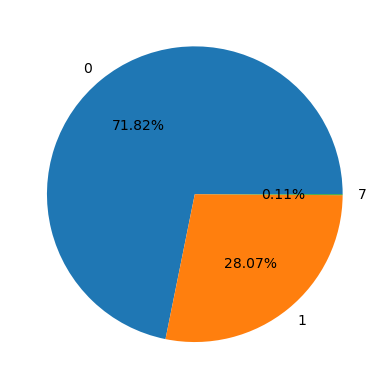

In [13]:
banner_positions = df.banner_pos.value_counts().index
# stores diffn banner_pos values. like (0,1,7,2,4,5,3)
banner_values = df.banner_pos.value_counts().values
# this stores their frequencies.

# pie chart (we wiil see top 3 positions)
plt.pie(banner_values[:3], labels = banner_positions[:3],autopct="%1.2f%%")

We can observe **71%** is covered by 0th postion only.

Now we will try to **count** how many times the **user clicks on Ad**, means **( y = 1)** in **'y'** col for different banner_position values. 

In [34]:
# Create a pivot table to count occurrences of '1' in 'y' for each unique value in 'banner_pos'
pivot_table = pd.pivot_table(df, index='banner_pos', values='y', aggfunc='sum', fill_value=0)

print(pivot_table)

                y
banner_pos       
0           11865
1            5074
2               5
3               1
4               1
5               0
7              34


We can **observe** that mostly user tries to **click on Ad**, when we put our banner (or Ad) at **0th and 1st position**.<br>
I think we can come to conclusion that when we put our Ad at **3rd,4th and 5th positions user will not click on Ad**.

Now we will try to explore the **time** aspect with the target variable **y**.
Here time aspect means. In our dataset we had cols **'dayofweek' , 'day' and 'hour'**.<br>
We try to analyse these variables with y.

In [15]:
df.groupby(['dayofweek','day','hour'])

In [16]:
df.groupby(['dayofweek','day','hour']).size()

dayofweek  day  hour
0          27   0       140
                1       195
                2       203
                3       277
                4       335
                       ... 
6          26   19      274
                20      247
                21      204
                22      190
                23      188
Length: 240, dtype: int64

Here it shows how many times (dayofweek,day,hour) combination repeated in our dataset.
There are **240 combinations**.

In [17]:
df.groupby(['dayofweek','day','hour']).size().reset_index()
# convert this into data frame.

,dayofweek,day,hour,0
0,0,27,0,140
1,0,27,1,195
2,0,27,2,203
3,0,27,3,277
4,0,27,4,335
...,...,...,...,...
235,6,26,19,274
236,6,26,20,247
237,6,26,21,204
238,6,26,22,190


In [21]:
# change col '0' name to other name.
# save the dataframe in time variable
time = df.groupby(['dayofweek','day','hour']).size().reset_index().rename(columns={0:'Frequency'})

In [22]:
time

,dayofweek,day,hour,Frequency
0,0,27,0,140
1,0,27,1,195
2,0,27,2,203
3,0,27,3,277
4,0,27,4,335
...,...,...,...,...
235,6,26,19,274
236,6,26,20,247
237,6,26,21,204
238,6,26,22,190


In [23]:
# Sort the DataFrame by the 'Frequency' column in descending order
sorted_df = time.sort_values(by='Frequency', ascending=False)

# Get the top 20 rows with maximum 'Frequency' values
top_20_rows = sorted_df.head(20)

# Display the top 20 rows
print(top_20_rows)

     dayofweek  day  hour  Frequency
81           2   22     9       1124
82           2   22    10       1090
61           1   28    13       1059
84           2   22    12       1018
83           2   22    11        965
62           1   28    14        948
148          3   30     4        889
57           1   28     9        833
80           2   22     8        775
78           2   22     6        773
56           1   28     8        735
85           2   22    13        722
29           1   21     5        713
65           1   28    17        696
60           1   28    12        685
185          4   24    17        684
77           2   22     5        678
64           1   28    16        676
158          3   30    14        658
156          3   30    12        650


<Axes: xlabel='dayofweek', ylabel='Frequency'>

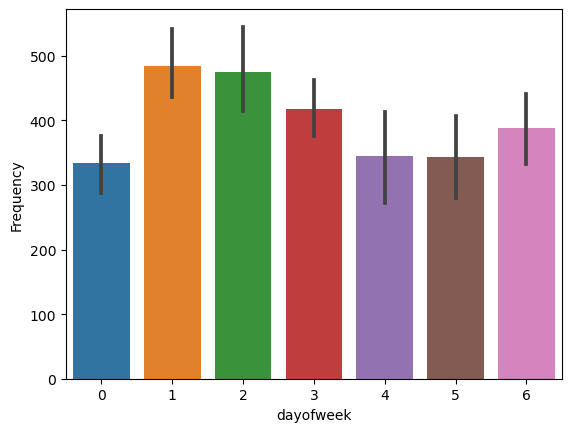

In [25]:
# visualize it.
# see relationship between day and the frequency.
sns.barplot(x="dayofweek",y="Frequency",data=time)

We can observe that **1st** day and **2nd** day are maximum utilised in dataset.

Now check **time** relation with **y**

In [35]:

merged_df = pd.merge(time, df, on=['dayofweek', 'day', 'hour'], how='left')

# Group by the 'time' DataFrame and sum 'y' values for each row
matched_rows = merged_df.groupby(['dayofweek', 'day', 'hour']).agg({'y': 'sum'}).reset_index()

# Sort the matched rows by 'y' values in descending order
matched_rows = matched_rows.sort_values(by='y', ascending=False).reset_index(drop=True)

# Display the top 20 matched rows
top_20_matched_rows = matched_rows.head(20)
print(top_20_matched_rows)

    dayofweek  day  hour    y
0           2   22     9  178
1           2   22    10  157
2           2   22    12  137
3           1   28    14  130
4           1   28    13  129
5           5   25    15  125
6           2   22     6  124
7           4   24    17  119
8           1   28    16  119
9           5   25    13  118
10          1   28    17  117
11          4   24    12  114
12          3   23     4  114
13          2   22     8  113
14          1   28    12  113
15          3   30    16  110
16          3   30    13  110
17          3   30    12  109
18          1   28    15  109
19          0   27    17  108


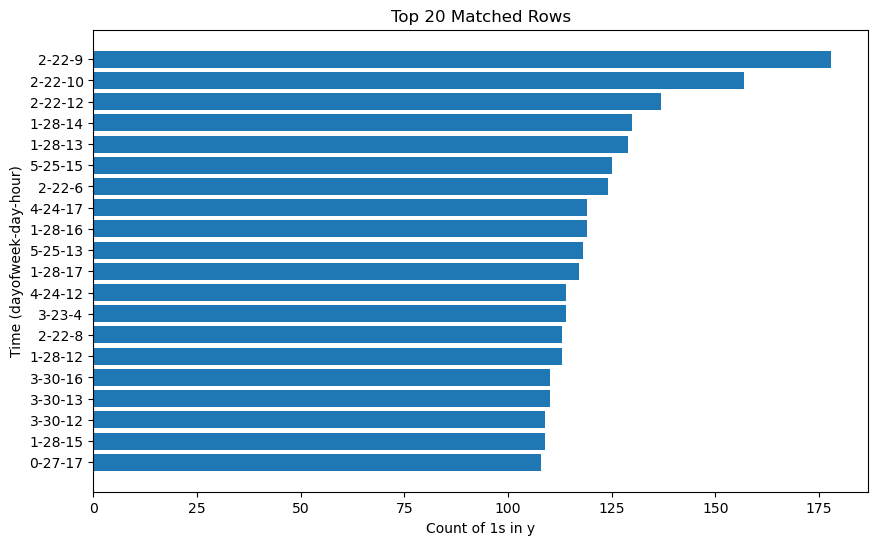

In [37]:
# Create a bar chart to visualize the top 20 matched rows
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_20_matched_rows)), top_20_matched_rows['y'], tick_label=top_20_matched_rows['dayofweek'].astype(str) + '-' + top_20_matched_rows['day'].astype(str) + '-' + top_20_matched_rows['hour'].astype(str))
plt.xlabel('Count of 1s in y')
plt.ylabel('Time (dayofweek-day-hour)')
plt.title('Top 20 Matched Rows')
plt.gca().invert_yaxis() 
plt.show()

We can observe that at **22 and 28 th days** in **morning times** like (9 to 15) more ads are **clicked** and also the days of week mostly are **1st and 2nd.**

Now we will see things related to **site**

In [28]:
df.groupby(['site_id','site_domain','site_category'])

In [29]:
df.groupby(['site_id','site_domain','site_category']).size()

site_id   site_domain  site_category
00255fb4  240a9324     50e219e0          2
003cf93d  08facbad     50e219e0          1
00f5367d  c4e18dd6     50e219e0          1
00f648b7  5575679a     50e219e0          1
00f7c6fc  c4e18dd6     50e219e0          1
                                        ..
ffcb6b9a  1e0acfb4     50e219e0          1
          c4e18dd6     50e219e0          1
          caeb852a     50e219e0          6
          fd0f18e8     50e219e0         10
ffcff165  daddcd03     f028772b          1
Length: 2198, dtype: int64

There are **2198** combinations.

In [30]:
#create site dataframe
site = df.groupby(['site_id','site_domain','site_category']).size().reset_index().rename(columns={0:'Site_Frequency'})

In [31]:
site

,site_id,site_domain,site_category,Site_Frequency
0,00255fb4,240a9324,50e219e0,2
1,003cf93d,08facbad,50e219e0,1
2,00f5367d,c4e18dd6,50e219e0,1
3,00f648b7,5575679a,50e219e0,1
4,00f7c6fc,c4e18dd6,50e219e0,1
...,...,...,...,...
2193,ffcb6b9a,1e0acfb4,50e219e0,1
2194,ffcb6b9a,c4e18dd6,50e219e0,1
2195,ffcb6b9a,caeb852a,50e219e0,6
2196,ffcb6b9a,fd0f18e8,50e219e0,10


In [33]:

sorted_df_site = site.sort_values(by='Site_Frequency', ascending=False)

# Get the top 20 rows with maximum 'Frequency' values
top_20_rows = sorted_df_site.head(20)

# Display the top 20 rows
print(top_20_rows)

       site_id site_domain site_category  Site_Frequency
1139  85f751fd    c4e18dd6      50e219e0           36022
240   1fbe01fe    f3845767      28905ebd           15862
1907  e151e245    7e091613      f028772b            6597
1842  d9750ee7    98572c79      f028772b            2376
793   5b08c53b    7687a86e      3e814130            2305
795   5b4d2eda    16a36ef3      f028772b            1927
1130  856e6d3f    58a89a43      f028772b            1880
1418  a7853007    7e091613      f028772b            1171
1536  b7e9786d    b12b9f85      f028772b             954
805   5bcf81a2    9d54950b      f028772b             825
829   5ee41ff2    17d996e6      f028772b             814
871   6399eda6    968765cd      f028772b             809
867   6256f5b4    28f93029      f028772b             766
764   57ef2c87    bd6d812f      f028772b             747
1966  e8f79e60    c4342784      f028772b             678
180   17caea14    0dde25ec      f028772b             665
767   57fe1b20    5b626596     

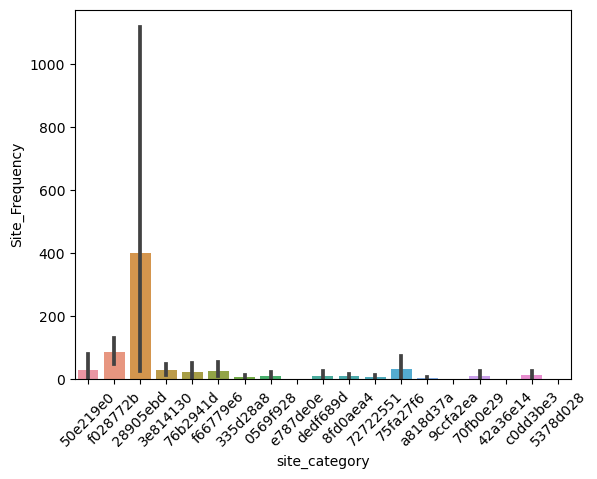

In [38]:
# visualize it.

sns.barplot(x="site_category", y="Site_Frequency", data=site)

# Rotate X-axis labels by 45 degrees for readability
plt.xticks(rotation=45)
plt.show()

We can observe for **'f028772b'** site category there are more no.of occurences. 

See what type of **site combinations have more tendency to click on the Ad by Users**

In [41]:

merged_df = pd.merge(site, df, on=['site_id','site_domain','site_category'], how='left')

# Group by the 'time' DataFrame and sum 'y' values for each row
matched_rows = merged_df.groupby(['site_id','site_domain','site_category']).agg({'y': 'sum'}).reset_index()

# Sort the matched rows by 'y' values in descending order
matched_rows = matched_rows.sort_values(by='y', ascending=False).reset_index(drop=True)

# Display the top 20 matched rows
top_20_matched_rows = matched_rows.head(20)
print(top_20_matched_rows)

     site_id site_domain site_category     y
0   85f751fd    c4e18dd6      50e219e0  4362
1   1fbe01fe    f3845767      28905ebd  3218
2   e151e245    7e091613      f028772b  1956
3   5b08c53b    7687a86e      3e814130  1055
4   d9750ee7    98572c79      f028772b   669
5   5ee41ff2    17d996e6      f028772b   272
6   4bf5bbe2    6b560cc1      28905ebd   246
7   5b4d2eda    16a36ef3      f028772b   233
8   93eaba74    7687a86e      3e814130   222
9   6c5b482c    7687a86e      3e814130   206
10  e8f79e60    c4342784      f028772b   178
11  0a742914    510bd839      f028772b   162
12  17caea14    0dde25ec      f028772b   156
13  57fe1b20    5b626596      f028772b   152
14  d6137915    bb1ef334      f028772b   140
15  a7853007    7e091613      f028772b   127
16  6256f5b4    28f93029      f028772b   117
17  38217daf    449497bc      f028772b   103
18  5bcf81a2    9d54950b      f028772b    87
19  57ef2c87    bd6d812f      f028772b    85


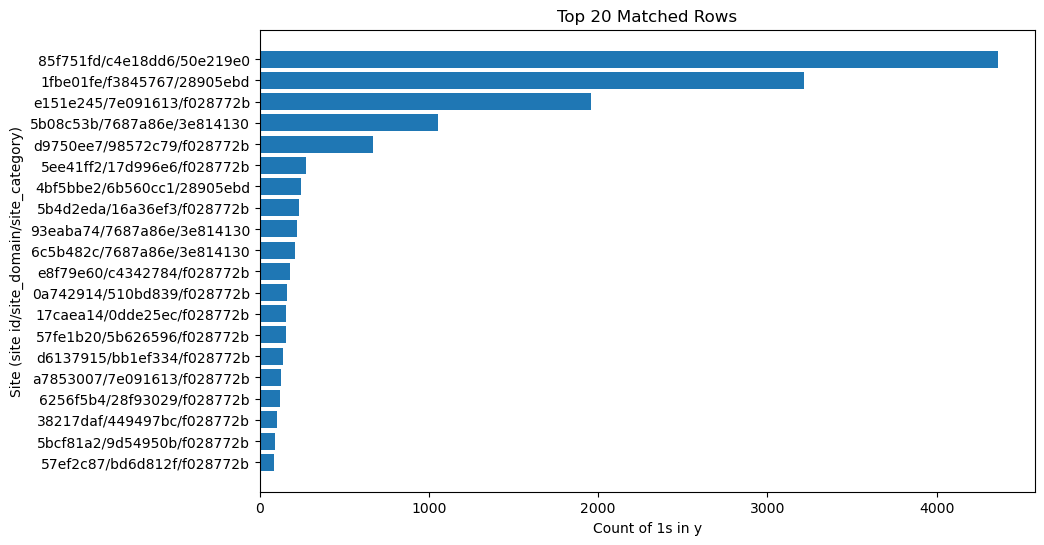

In [42]:
# Create a bar chart to visualize the top 20 matched rows
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_20_matched_rows)), top_20_matched_rows['y'], tick_label=top_20_matched_rows['site_id'].astype(str) + '/' + top_20_matched_rows['site_domain'].astype(str) + '/' + top_20_matched_rows['site_category'].astype(str))
plt.xlabel('Count of 1s in y')
plt.ylabel('Site (site id/site_domain/site_category)')
plt.title('Top 20 Matched Rows')
plt.gca().invert_yaxis() 
plt.show()

From above bar graph, we can observe what **type of site combinations**, have the more tendency to be **clicked by the user**.

Now similarly we will create for **App.**

In [43]:
#create app dataframe
app = df.groupby(['app_id','app_domain','app_category']).size().reset_index().rename(columns={0:'App_Frequency'})

In [44]:
app

,app_id,app_domain,app_category,App_Frequency
0,003def94,2347f47a,0f2161f8,3
1,00768b3e,7801e8d9,0f2161f8,1
2,00848fac,2347f47a,cef3e649,1
3,00b4e81c,d9b5648e,0f2161f8,1
4,00deaeb7,7801e8d9,07d7df22,1
...,...,...,...,...
1350,fed1c10a,7801e8d9,0f2161f8,1
1351,fee18fc3,d9b5648e,0f2161f8,2
1352,ff665dfa,2347f47a,0f2161f8,1
1353,ff8e002b,2347f47a,0f2161f8,3


In [45]:

sorted_df_site = app.sort_values(by='App_Frequency', ascending=False)

# Get the top 20 rows with maximum 'Frequency' values
top_20_rows = sorted_df_site.head(20)

# Display the top 20 rows
print(top_20_rows)

        app_id app_domain app_category  App_Frequency
1255  ecad2386   7801e8d9     07d7df22          63977
761   92f5800b   ae637522     0f2161f8           3865
1197  e2fcccd2   5c5a694b     0f2161f8           2849
1349  febd1138   82e27996     0f2161f8           1888
808   9c13b419   2347f47a     f95efa07           1867
599   7358e05e   b9528b13     cef3e649           1521
860   a5184c22   b8d325c3     0f2161f8           1196
1109  d36838b1   0e8616ad     0f2161f8           1134
447   54c5d545   2347f47a     0f2161f8            953
549   685d1c4c   2347f47a     8ded1f7a            949
1274  f0d41ff1   2347f47a     0f2161f8            799
21    03528b27   2347f47a     8ded1f7a            779
1231  e9739828   df32afa9     cef3e649            714
1195  e2a1ca37   2347f47a     8ded1f7a            679
429   51cedd4e   aefc06bd     0f2161f8            555
792   98fed791   d9b5648e     0f2161f8            544
542   66f5e02e   6f7ca2ba     0f2161f8            543
23    03a08c3f   7801e8d9   

In [46]:

merged_df = pd.merge(app, df, on=['app_id','app_domain','app_category'], how='left')

# Group by the 'time' DataFrame and sum 'y' values for each row
matched_rows = merged_df.groupby(['app_id','app_domain','app_category']).agg({'y': 'sum'}).reset_index()

# Sort the matched rows by 'y' values in descending order
matched_rows = matched_rows.sort_values(by='y', ascending=False).reset_index(drop=True)

# Display the top 20 matched rows
top_20_matched_rows = matched_rows.head(20)
print(top_20_matched_rows)

      app_id app_domain app_category      y
0   ecad2386   7801e8d9     07d7df22  12618
1   9c13b419   2347f47a     f95efa07    611
2   e2fcccd2   5c5a694b     0f2161f8    546
3   7358e05e   b9528b13     cef3e649    302
4   a5184c22   b8d325c3     0f2161f8    278
5   66f5e02e   6f7ca2ba     0f2161f8    127
6   54c5d545   2347f47a     0f2161f8    121
7   03528b27   2347f47a     8ded1f7a    101
8   e2a1ca37   2347f47a     8ded1f7a    100
9   febd1138   82e27996     0f2161f8     96
10  685d1c4c   2347f47a     8ded1f7a     86
11  92f5800b   ae637522     0f2161f8     80
12  98fed791   d9b5648e     0f2161f8     72
13  d36838b1   0e8616ad     0f2161f8     68
14  be7c618d   2347f47a     f95efa07     49
15  4e02fbd3   7801e8d9     07d7df22     47
16  f0d41ff1   2347f47a     0f2161f8     41
17  de97da65   33da2e74     0f2161f8     40
18  a4869716   2347f47a     d1327cf5     36
19  3c4b944d   2347f47a     0f2161f8     35


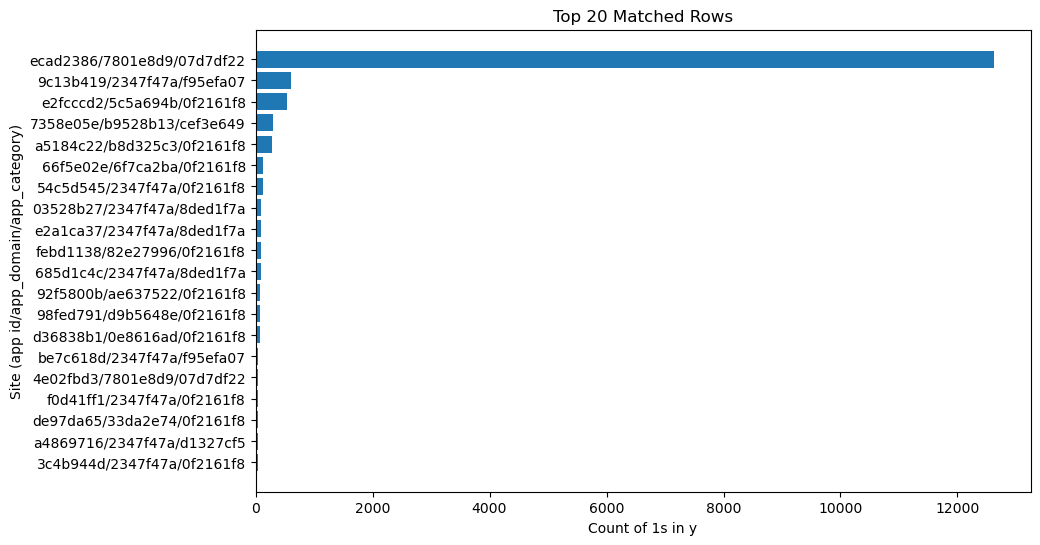

In [47]:
# Create a bar chart to visualize the top 20 matched rows
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_20_matched_rows)), top_20_matched_rows['y'], tick_label=top_20_matched_rows['app_id'].astype(str) + '/' + top_20_matched_rows['app_domain'].astype(str) + '/' + top_20_matched_rows['app_category'].astype(str))
plt.xlabel('Count of 1s in y')
plt.ylabel('Site (app id/app_domain/app_category)')
plt.title('Top 20 Matched Rows')
plt.gca().invert_yaxis() 
plt.show()

# Data Cleaning and Outlier treatment.

As there are **no missing values**, just we find **duplicate rows** and remove it.

In [48]:
# Remove duplicate rows
df = df.drop_duplicates()

In [49]:
df.shape

(99341, 26)

We can observe some **rows** has been **dropped**.

## Outlier tratement for numerical values.

We will use **IQR technique** for outlier detection.

In [50]:
# Before applying the Outlier technique, just see the range of values.
# If range is small no need to apply outlier treatment.
df['C1'].value_counts()

1005    91213
1002     5489
1010     2263
1012      253
1007       93
1001       21
1008        9
Name: C1, dtype: int64

See there is a small range of C1 values from (1001 to 1010), no need of outlier treatment.

Already we checked **"banner_pos" col**, it also does not require **outlier treatment.**

In [51]:
df['device_type'].value_counts()

1    91589
0     5489
4     1928
5      335
Name: device_type, dtype: int64

Here also, small range of values.

In [52]:
df['device_conn_type'].value_counts()

0    85872
2     7932
3     5422
5      115
Name: device_conn_type, dtype: int64

In [53]:
df['C14'].value_counts()

4687     2302
21611    2172
21189    1906
21191    1896
19772    1821
         ... 
19418       1
21705       1
15506       1
9803        1
16153       1
Name: C14, Length: 1722, dtype: int64

Now we can see large range of values, so we can do **outlier treatment**.

In **IQR:**
1) calcualte Q1 and Q3
2) calculate lower_limit and upper_limit.
**lower_limit = Q1 - (1.5 x IQR) <br>
upper_limit = Q3 + (1.5 x IQR)**

In [54]:
Q1 = df.C14.quantile(0.25)
Q3 = df.C14.quantile(0.75)
Q1, Q3

(16920.0, 21893.0)

In [55]:
IQR = Q3 - Q1
IQR

4973.0

In [56]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(9460.5, 29352.5)

In [57]:
df[(df.C14<lower_limit)|(df.C14>upper_limit)]

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
40,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,bba1bf1f,b8a9a187,...,178,3,1327,100148,15,10,3,23,21,0
51,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,e0aba53c,...,423,2,39,100148,32,10,0,27,17,0
58,1002,0,c040c1dd,9ef91475,50e219e0,ecad2386,7801e8d9,07d7df22,8ba5fdae,59bf6c34,...,572,2,39,-1,32,10,0,27,12,0
59,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,4a825b15,...,423,2,39,100148,32,10,4,24,14,0
87,1005,0,f6cba1bd,5c9c05b7,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,06324151,...,761,3,175,100077,23,10,5,25,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99915,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,f9d62dfd,5aeb29a0,...,178,3,1327,100148,15,10,3,23,11,1
99937,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,1ea331e5,...,423,2,39,100148,32,10,1,21,20,1
99968,1005,0,6256f5b4,28f93029,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,f1a323ab,...,572,2,39,-1,32,10,3,23,6,0
99978,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,63834219,...,571,2,39,100048,32,10,0,27,8,1


See these are the **outliers** there are total **8171 outliers** in **99999 row**s, with respect to **C14 col**

In [58]:
# If you want you can remove these outliers from our dataframe.
# store it in new dataframe as of now.
df_no_outlier = df[(df.C14>lower_limit)&(df.C14<upper_limit)]
df_no_outlier

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,...,2528,0,39,100075,221,10,1,28,14,0
1,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,...,1934,2,39,-1,16,10,2,22,19,1
2,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,...,2552,3,167,100202,23,10,3,23,18,0
3,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,...,2478,3,167,100074,23,10,2,22,19,0
4,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,...,1722,0,35,-1,79,10,1,21,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1005,0,7294ea0f,863fa89d,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,783d53a5,...,1973,3,39,100148,23,10,3,23,15,0
99995,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,79117e3c,...,2545,0,167,100084,221,10,2,29,0,0
99996,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,927c68c6,e774692b,...,2443,2,39,-1,23,10,2,22,15,1
99997,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,4815ea13,...,2295,2,35,100081,23,10,5,25,8,1


Here, we also know other numeric cols, such as **month**, **dayofweek**, **day**, **hour**. <br>
These all cols, will have shorter range, so no need outlier treatment.

In [59]:
df['C15'].value_counts()

320     92484
300      5867
216       775
728       186
120        10
480         9
1024        7
768         3
Name: C15, dtype: int64

In [60]:
df['C16'].value_counts()

50      93556
250      4528
36        775
480       267
90        186
20         10
320         9
768         7
1024        3
Name: C16, dtype: int64

In **c15,c16,... to C21**, there is small difference between range of values. If we want we can do outlier_tratement.

# Encoding.

In [61]:
# converting categorical features into numeric features.
import category_encoders as ce

# List of columns to encode
cols_to_encode = [
    'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 
    'app_category', 'device_id', 'device_ip', 'device_model'
]

# Initialize the BinaryEncoder
encoder = ce.BinaryEncoder(cols=cols_to_encode)

# Perform binary encoding
encoded_df = encoder.fit_transform(df)

# Display the encoded DataFrame
print(encoded_df)

         C1  banner_pos  site_id_0  site_id_1  site_id_2  site_id_3  \
0      1005           1          0          0          0          0   
1      1005           1          0          0          0          0   
2      1005           0          0          0          0          0   
3      1002           0          0          0          0          0   
4      1005           0          0          0          0          0   
...     ...         ...        ...        ...        ...        ...   
99994  1005           0          0          0          0          0   
99995  1005           0          0          0          0          0   
99996  1005           0          0          0          0          0   
99997  1005           0          0          0          0          0   
99998  1005           0          0          0          0          0   

       site_id_4  site_id_5  site_id_6  site_id_7  ...   C17  C18  C19  \
0              0          0          0          0  ...  2528    0   39   

# Feature Engineering.

We will try to create a feature **MMDDHH(mm-month,dd-day,hh-hour)**, like a timestamp.<br>
which is useful for time purpose.

In [62]:
# Create a copy of the DataFrame to avoid modifying the original data
new_df = df.copy()

In [63]:
# Create the 'MMDDHH' column by combining individual columns
new_df['MMDDHH'] = (
    new_df['month'].astype(str).str.zfill(2) + 
    new_df['day'].astype(str).str.zfill(2) + 
    new_df['hour'].astype(str).str.zfill(2)
)

# Define the desired column order
desired_order = [
    'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 
    'app_id', 'app_domain', 'app_category', 'device_id', 'C14', 
    'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'month', 
    'dayofweek', 'day', 'hour', 'MMDDHH', 'y'
]

# Reorder the columns based on the desired order
new_df = new_df[desired_order]

In [64]:
new_df

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,C14,...,C18,C19,C20,C21,month,dayofweek,day,hour,MMDDHH,y
0,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,22683,...,0,39,100075,221,10,1,28,14,102814,0
1,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,17037,...,2,39,-1,16,10,2,22,19,102219,1
2,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,22155,...,3,167,100202,23,10,3,23,18,102318,0
3,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,21591,...,3,167,100074,23,10,2,22,19,102219,0
4,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,15708,...,0,35,-1,79,10,1,21,8,102108,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1005,0,7294ea0f,863fa89d,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,17239,...,3,39,100148,23,10,3,23,15,102315,0
99995,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,22261,...,0,167,100084,221,10,2,29,0,102900,0
99996,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,927c68c6,21276,...,2,39,-1,23,10,2,22,15,102215,1
99997,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,20093,...,2,35,100081,23,10,5,25,8,102508,1


Next we can create, frequency col for app_category values, which tells how many times that app_category value appeared.

In [65]:

# Calculate the frequency of each 'app_category' value and store it in a dictionary
app_category_frequency = new_df['app_category'].value_counts().to_dict()

# Create a new column 'frequency_app_category' by mapping the 'app_category' values to their frequencies
new_df.insert(new_df.columns.get_loc('app_category') + 1, 'frequency_app_category', new_df['app_category'].map(app_category_frequency))

new_df

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,frequency_app_category,device_id,...,C18,C19,C20,C21,month,dayofweek,day,hour,MMDDHH,y
0,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,64502,a99f214a,...,0,39,100075,221,10,1,28,14,102814,0
1,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,64502,a99f214a,...,2,39,-1,16,10,2,22,19,102219,1
2,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,64502,a99f214a,...,3,167,100202,23,10,3,23,18,102318,0
3,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,64502,0fa578fd,...,3,167,100074,23,10,2,22,19,102219,0
4,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,64502,a99f214a,...,0,35,-1,79,10,1,21,8,102108,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1005,0,7294ea0f,863fa89d,3e814130,ecad2386,7801e8d9,07d7df22,64502,a99f214a,...,3,39,100148,23,10,3,23,15,102315,0
99995,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,64502,a99f214a,...,0,167,100084,221,10,2,29,0,102900,0
99996,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,4289,927c68c6,...,2,39,-1,23,10,2,22,15,102215,1
99997,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,64502,a99f214a,...,2,35,100081,23,10,5,25,8,102508,1


see another col added.

Now, we can do this for **site_domain** also.

In [66]:

# Calculate the frequency of each 'app_category' value and store it in a dictionary
site_domain_frequency = new_df['site_domain'].value_counts().to_dict()

# Create a new column 'frequency_app_category' by mapping the 'app_category' values to their frequencies
new_df.insert(new_df.columns.get_loc('site_domain') + 1, 'frequency_site_domain', new_df['site_domain'].map(site_domain_frequency))

new_df

,C1,banner_pos,site_id,site_domain,frequency_site_domain,site_category,app_id,app_domain,app_category,frequency_app_category,...,C18,C19,C20,C21,month,dayofweek,day,hour,MMDDHH,y
0,1005,1,856e6d3f,58a89a43,1874,f028772b,ecad2386,7801e8d9,07d7df22,64502,...,0,39,100075,221,10,1,28,14,102814,0
1,1005,1,e151e245,7e091613,8153,f028772b,ecad2386,7801e8d9,07d7df22,64502,...,2,39,-1,16,10,2,22,19,102219,1
2,1005,0,e3c09f3a,d262cf1e,744,28905ebd,ecad2386,7801e8d9,07d7df22,64502,...,3,167,100202,23,10,3,23,18,102318,0
3,1002,0,0da94452,248e439f,5,50e219e0,ecad2386,7801e8d9,07d7df22,64502,...,3,167,100074,23,10,2,22,19,102219,0
4,1005,0,1fbe01fe,f3845767,15844,28905ebd,ecad2386,7801e8d9,07d7df22,64502,...,0,35,-1,79,10,1,21,8,102108,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1005,0,7294ea0f,863fa89d,160,3e814130,ecad2386,7801e8d9,07d7df22,64502,...,3,39,100148,23,10,3,23,15,102315,0
99995,1005,0,1fbe01fe,f3845767,15844,28905ebd,ecad2386,7801e8d9,07d7df22,64502,...,0,167,100084,221,10,2,29,0,102900,0
99996,1005,0,85f751fd,c4e18dd6,36970,50e219e0,7358e05e,b9528b13,cef3e649,4289,...,2,39,-1,23,10,2,22,15,102215,1
99997,1005,0,5b08c53b,7687a86e,3219,3e814130,ecad2386,7801e8d9,07d7df22,64502,...,2,35,100081,23,10,5,25,8,102508,1


If we want, we can add some other meaningful features.

# Feature_Selection

In [67]:
X = encoded_df.iloc[:,:-1] # except last column
y = encoded_df['y'] # target variable

In [68]:
X.head()

,C1,banner_pos,site_id_0,site_id_1,site_id_2,site_id_3,site_id_4,site_id_5,site_id_6,site_id_7,...,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour
0,1005,1,0,0,0,0,0,0,0,0,...,50,2528,0,39,100075,221,10,1,28,14
1,1005,1,0,0,0,0,0,0,0,0,...,50,1934,2,39,-1,16,10,2,22,19
2,1005,0,0,0,0,0,0,0,0,0,...,50,2552,3,167,100202,23,10,3,23,18
3,1002,0,0,0,0,0,0,0,0,0,...,50,2478,3,167,100074,23,10,2,22,19
4,1005,0,0,0,0,0,0,0,0,0,...,50,1722,0,35,-1,79,10,1,21,8


In [69]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: y, dtype: int64

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif  # Import Mutual Information score function


# Create a SelectKBest instance with Mutual Information and fit it to your data
k_best_mi = SelectKBest(score_func=mutual_info_classif, k=60)  # Adjust 'k' to the number of features.
k_best_mi.fit(X, y)

# Get the indices of selected features (columns)
selected_indices_mi = k_best_mi.get_support(indices=True)

# Get the names of selected columns
selected_column_names_mi = [X.columns[i] for i in selected_indices_mi]

# Print the names of selected columns
print("Selected column names (Mutual Information):", selected_column_names_mi)

Selected column names (Mutual Information): ['C1', 'site_id_2', 'site_id_7', 'site_id_8', 'site_id_9', 'site_id_10', 'site_domain_7', 'site_domain_9', 'site_domain_10', 'site_category_2', 'site_category_3', 'site_category_4', 'app_id_0', 'app_id_8', 'app_id_10', 'app_domain_4', 'app_domain_6', 'app_category_3', 'app_category_4', 'device_id_5', 'device_id_14', 'device_ip_1', 'device_ip_2', 'device_ip_3', 'device_ip_4', 'device_ip_5', 'device_ip_6', 'device_ip_7', 'device_ip_8', 'device_ip_9', 'device_ip_10', 'device_ip_11', 'device_ip_12', 'device_ip_13', 'device_ip_14', 'device_ip_15', 'device_ip_16', 'device_model_0', 'device_model_2', 'device_model_3', 'device_model_5', 'device_model_6', 'device_model_7', 'device_model_8', 'device_model_9', 'device_model_10', 'device_model_11', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour']


See here for **feature_selection** I used **mutual_info_classif** as the score function, for Mutual Information-based feature selection. And I also given **k=60**, because after doing binary encoding we get 110 cols. In that I want to use atleast half of the columns for the **model training**, so I used k = 60

Above shown are the **selected cols**.<br>
Now we had completed **selecting features**, now we have to **scale them**.

# Feature Scaling

In [72]:
from sklearn.preprocessing import StandardScaler
# Get the selected columns
# Get the indices of selected features.
selected_indices_mi = k_best_mi.get_support(indices=True)
selected_columns = X.iloc[:, selected_indices_mi]

# Perform feature scaling on the selected columns
scaler = StandardScaler()
scaled_selected_columns = scaler.fit_transform(selected_columns)

In [73]:
scaled_selected_columns

array([[ 0.02990277, -0.21257621, -1.10483255, ..., -0.92336796,
         0.84861467,  0.45279072],
       [ 0.02990277, -0.21257621, -1.10483255, ..., -0.34378854,
        -1.17497071,  1.29452347],
       [ 0.02990277, -0.21257621, -1.10483255, ...,  0.23579088,
        -0.83770648,  1.12617692],
       ...,
       [ 0.02990277, -0.21257621,  0.90511453, ..., -0.34378854,
        -1.17497071,  0.62113727],
       [ 0.02990277, -0.21257621,  0.90511453, ...,  1.39494973,
        -0.16317802, -0.55728858],
       [ 0.02990277, -0.21257621, -1.10483255, ..., -0.92336796,
         0.84861467, -1.73571442]])

See all the values are in **same range** or in closer region.

# Train and Evaluate the model

### Using Logistic Regression

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_selected_columns, y, test_size=0.2, random_state=42)

# Initialize and train the model (replace with your chosen algorithm)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the target values on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8333584981629675
Confusion Matrix:
[[16503    58]
 [ 3253    55]]


We can see we get **83.3%** accuracy on our model. <br>
We can also say **16503+55 = 165558** values are predicted **correctly.**
We can also say **3253+58 = 3311** values are predicted **wrong**. From **confusion matrix.**

# Using Random Forest Classifier.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_selected_columns, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 500, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict the target values on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8339121244149177
Confusion Matrix:
[[16345   216]
 [ 3084   224]]


We get similar results as **Logistic Regression model**, but with little changes.

We can find the best parameters for Random Forest model by using **GridSearchCV** we can also use it.